In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve
import copy
import scipy.linalg as la

In [ ]:
A = np.array([[3,2,-1],[5,1,7],[0,1,-1]])
b = np.array([[4],[4],[5]])
print(np.linalg.det(A))
print(np.linalg.inv(A))
print(np.matmul(np.linalg.inv(A),b))
# Solucion usando la matriz inversa
# Peor manera

-19.000000000000004
[[ 0.42105263 -0.05263158 -0.78947368]
 [-0.26315789  0.15789474  1.36842105]
 [-0.26315789  0.15789474  0.36842105]]
[[-2.47368421]
 [ 6.42105263]
 [ 1.42105263]]


# Solución de un sistema triangular superior

Supongamos que se tiene un sistema triangular superior de la forma

\begin{equation}
\begin{pmatrix}
a_{1,1} & a_{1,2} & \dots & a_{1,n} \\
0 & a_{2,2} & \dots & a_{2,n} \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & a_{n,n}
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
\vdots \\
x_n
\end{pmatrix}
=
\begin{pmatrix}
b_1 \\
b_2 \\
\vdots \\
b_n
\end{pmatrix}
\end{equation}

Usando sustitución hacia atrás tenemos que

\begin{align*}
x_n &= \frac{b_n}{a_{n,n}} \\
x_{n-1} &= \frac{b_{n-1} - a_{n-1,n} x_n}{a_{n-1,n-1}} \\
\vdots \\
x_1 &= \frac{b_1 - a_{1,2} x_2 - \dots - a_{1,n} x_n}{a_{1,1}}
\end{align*}

## Ejemplo

Consideremos el siguiente sistema triangular superior:

\begin{equation}
\begin{pmatrix}
2 & 1 & 3 \\
0 & 3 & 2 \\
0 & 0 & 1
\end{pmatrix}
\begin{pmatrix}
x_1 \\
x_2 \\
x_3
\end{pmatrix}
=
\begin{pmatrix}
5 \\
7 \\
4
\end{pmatrix}
\end{equation}

Aplicando el método de sustitución hacia atrás, obtenemos:

\begin{align*}
x_3 &= \frac{4}{1} = 4 \\
x_2 &= \frac{7 - 2 x_3}{3} = \frac{7 - 2 \cdot 4}{3} = 1 \\
x_1 &= \frac{5 - x_2 - 3 x_3}{2} = \frac{5 - 1 - 3 \cdot 4}{2} = -5
\end{align*}

Por lo tanto, la solución del sistema es $x_1 = -5$, $x_2 = 1$, $x_3 = 4$.

Asi que:

\begin{equation}
x_i = \frac{b_i - \sum_{j=i+1}^n a_{i,j} x_j}{a_{i,i}}
\end{equation}




In [ ]:

# Matriz A
A = np.array([[2, 1, 3],
              [0, 3, 2],
              [0, 0, 1]])
# Vector b
b = np.array([5, 8, 4])

def sustitucion_atras( A, b ):

  n = len(b)
  x = np.zeros(n)

  for i in range( -1, -n-1, -1):
    x[i] = (b[i] - np.dot(A[i, i+1:], x[i+1:])) / A[i, i]

  return x

print(sustitucion_atras_sup(A, b))

# Matriz A
A = np.array([
  [2, 0, 0],
  [-3, 1, 0],
  [1, 4, -2]
])

# Vector b
b = np.array([-2, 7, 11])

def sustitucion_adelante(A, b):

  n = len(b)
  x = np.zeros(n)

  for i in range(0, n, 1):
    if i > 0:
      x[i] = (b[i] - np.dot(A[i, :i], x[:i])) / A[i, i]
    else:
      x[i] = b[i] / A[i, i]

  return x

print(sustitucion_atras_inf(A, b))

[-3.5  0.   4. ]
[-1.  4.  2.]



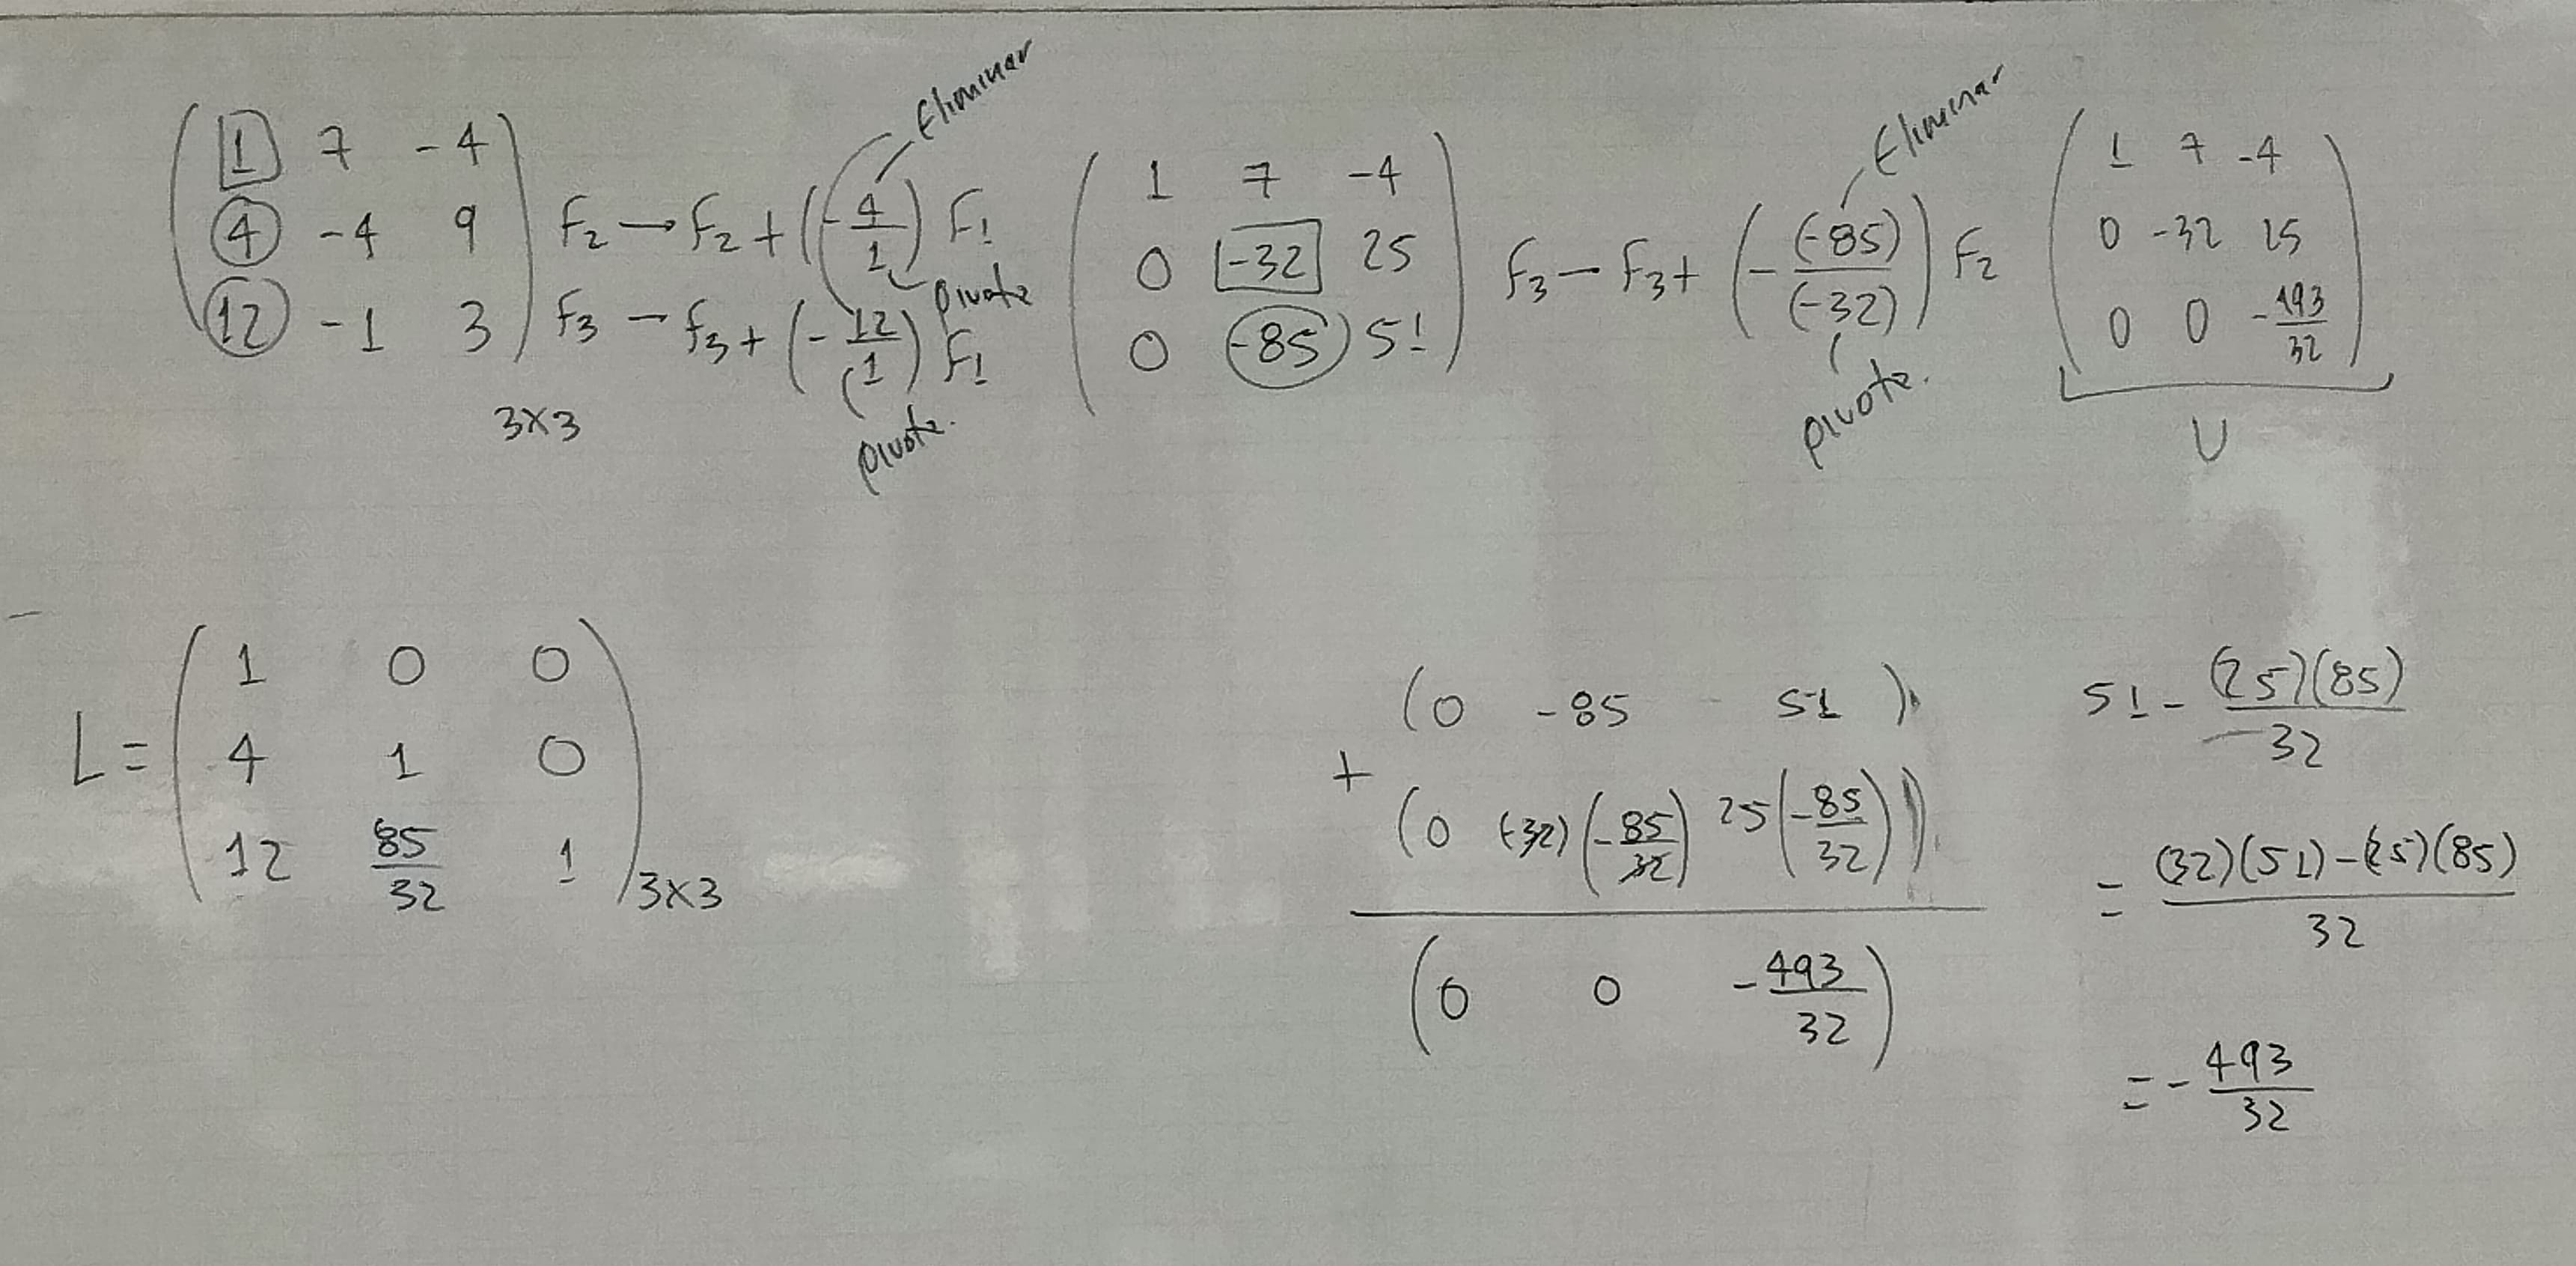

In [ ]:
A = np.array([
  [1, 7, -4],
  [4, -4, 9],
  [12, -1, 3]
])

def fact_lu(A):
    [n,m]=np.shape(A)

    U=copy.copy(A)

    L=np.identity(n)
    for j in range(0,n,1): # columna
        for i in range(j+1,n,1): # fila
            L[i,j]=U[i,j]/U[j,j]
            U[i,:]=U[i,:]+(-U[i,j]/U[j,j])*U[j,:]

    return L,U

A=np.array([[ 1.0, 4,-2], [3,-2, 5.], [ 2, 3, 1.]], float)

print(fact_lu(A))


(array([[1.        , 0.        , 0.        ],
       [3.        , 1.        , 0.        ],
       [2.        , 0.35714286, 1.        ]]), array([[  1.        ,   4.        ,  -2.        ],
       [  0.        , -14.        ,  11.        ],
       [  0.        ,   0.        ,   1.07142857]]))


# Descomposicion PLU

In [ ]:
A = np.array([[0,-3,4],[2,1,6],[-4,1,3]])
B = np.array([[0,1,0],[1,0,0],[0,0,1]])
print(A.dot(B))

[[-3  0  4]
 [ 1  2  6]
 [ 1 -4  3]]


In [ ]:

A = np.array([[0, 3, -4], [2, 1, 6], [-4, 1, 3]])
P = np.array([[0, 0, 1], [1, 0, 0], [0, 1, 0]]) # Permutación
PA = np.matmul(P, A)

U = np.array([[-4, 1, 3], [0, 3, -4], [0, 0, 19/2]])
L = np.array([[1, 0, 0], [0, 1, 0], [-1/2, 1/2, 1]])
LU = np.matmul(L, U)

if np.array_equal(PA, LU):
    print("PA:\n", PA)
    print("\nLU:\n", LU)
    print("\nLas Matrices Son Iguales")
else:
    print("No Son Iguales")

P, L, U = la.lu(A)
print(np.transpose(P),"\n",L,"\n",U)

PA:
 [[-4  1  3]
 [ 0  3 -4]
 [ 2  1  6]]

LU:
 [[-4.  1.  3.]
 [ 0.  3. -4.]
 [ 2.  1.  6.]]

Las Matrices Son Iguales
[[0. 0. 1.]
 [1. 0. 0.]
 [0. 1. 0.]] 
 [[ 1.   0.   0. ]
 [-0.   1.   0. ]
 [-0.5  0.5  1. ]] 
 [[-4.   1.   3. ]
 [ 0.   3.  -4. ]
 [ 0.   0.   9.5]]


In [ ]:
A =  np.array([[-3, 1, 1, 0], [-6, 2, 2, 2], [3, 3, 2, -1], [3,7,2,0]])
b = b = np.array([1, 3, 1, 2])
def sol_plu(A, b):
  P, L, U = la.lu(A)
  c = np.matmul(np.transpose(P), b)
  d = sustitucion_adelante( L, c)
  x = sustitucion_atras(U, d)
  return x

print(sol_plu(A, b))
print(A.dot(sol_plu(A, b)))

[-0.06944444  0.125       0.66666667  0.5       ]
[1. 3. 1. 2.]


# Normas vectoriales


Una función $\|\cdot\|: \mathbb{R}^n \to \mathbb{Z}$ con la forma

$$\|\mathbf{x}\| = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}$$

es llamada una **norma vectorial** si satisface las siguientes condiciones:

**Positividad:** Para todo $\mathbf{x} \in \mathbb{R}^n$, entonces $\|\mathbf{x}\| \geq 0$. Si $\mathbf{x} = \mathbf{0}$ (vector nulo), entonces $\|\mathbf{x}\| = 0$.

**Homogeneidad:** Sea $a \in \mathbb{R}$, entonces $\|\alpha \mathbf{x}\| = |a| \|\mathbf{x}\|$.

**Desigualdad triangular:** Para todo $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$, entonces $\|\mathbf{x} + \mathbf{y}\| \leq \|\mathbf{x}\| + \|\mathbf{y}\|$.

![image.png](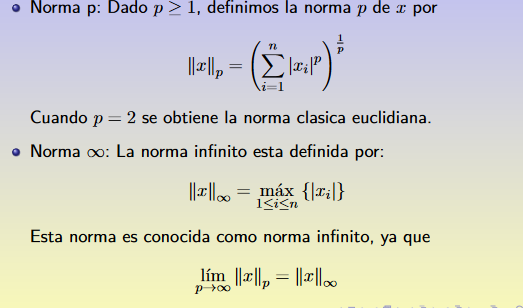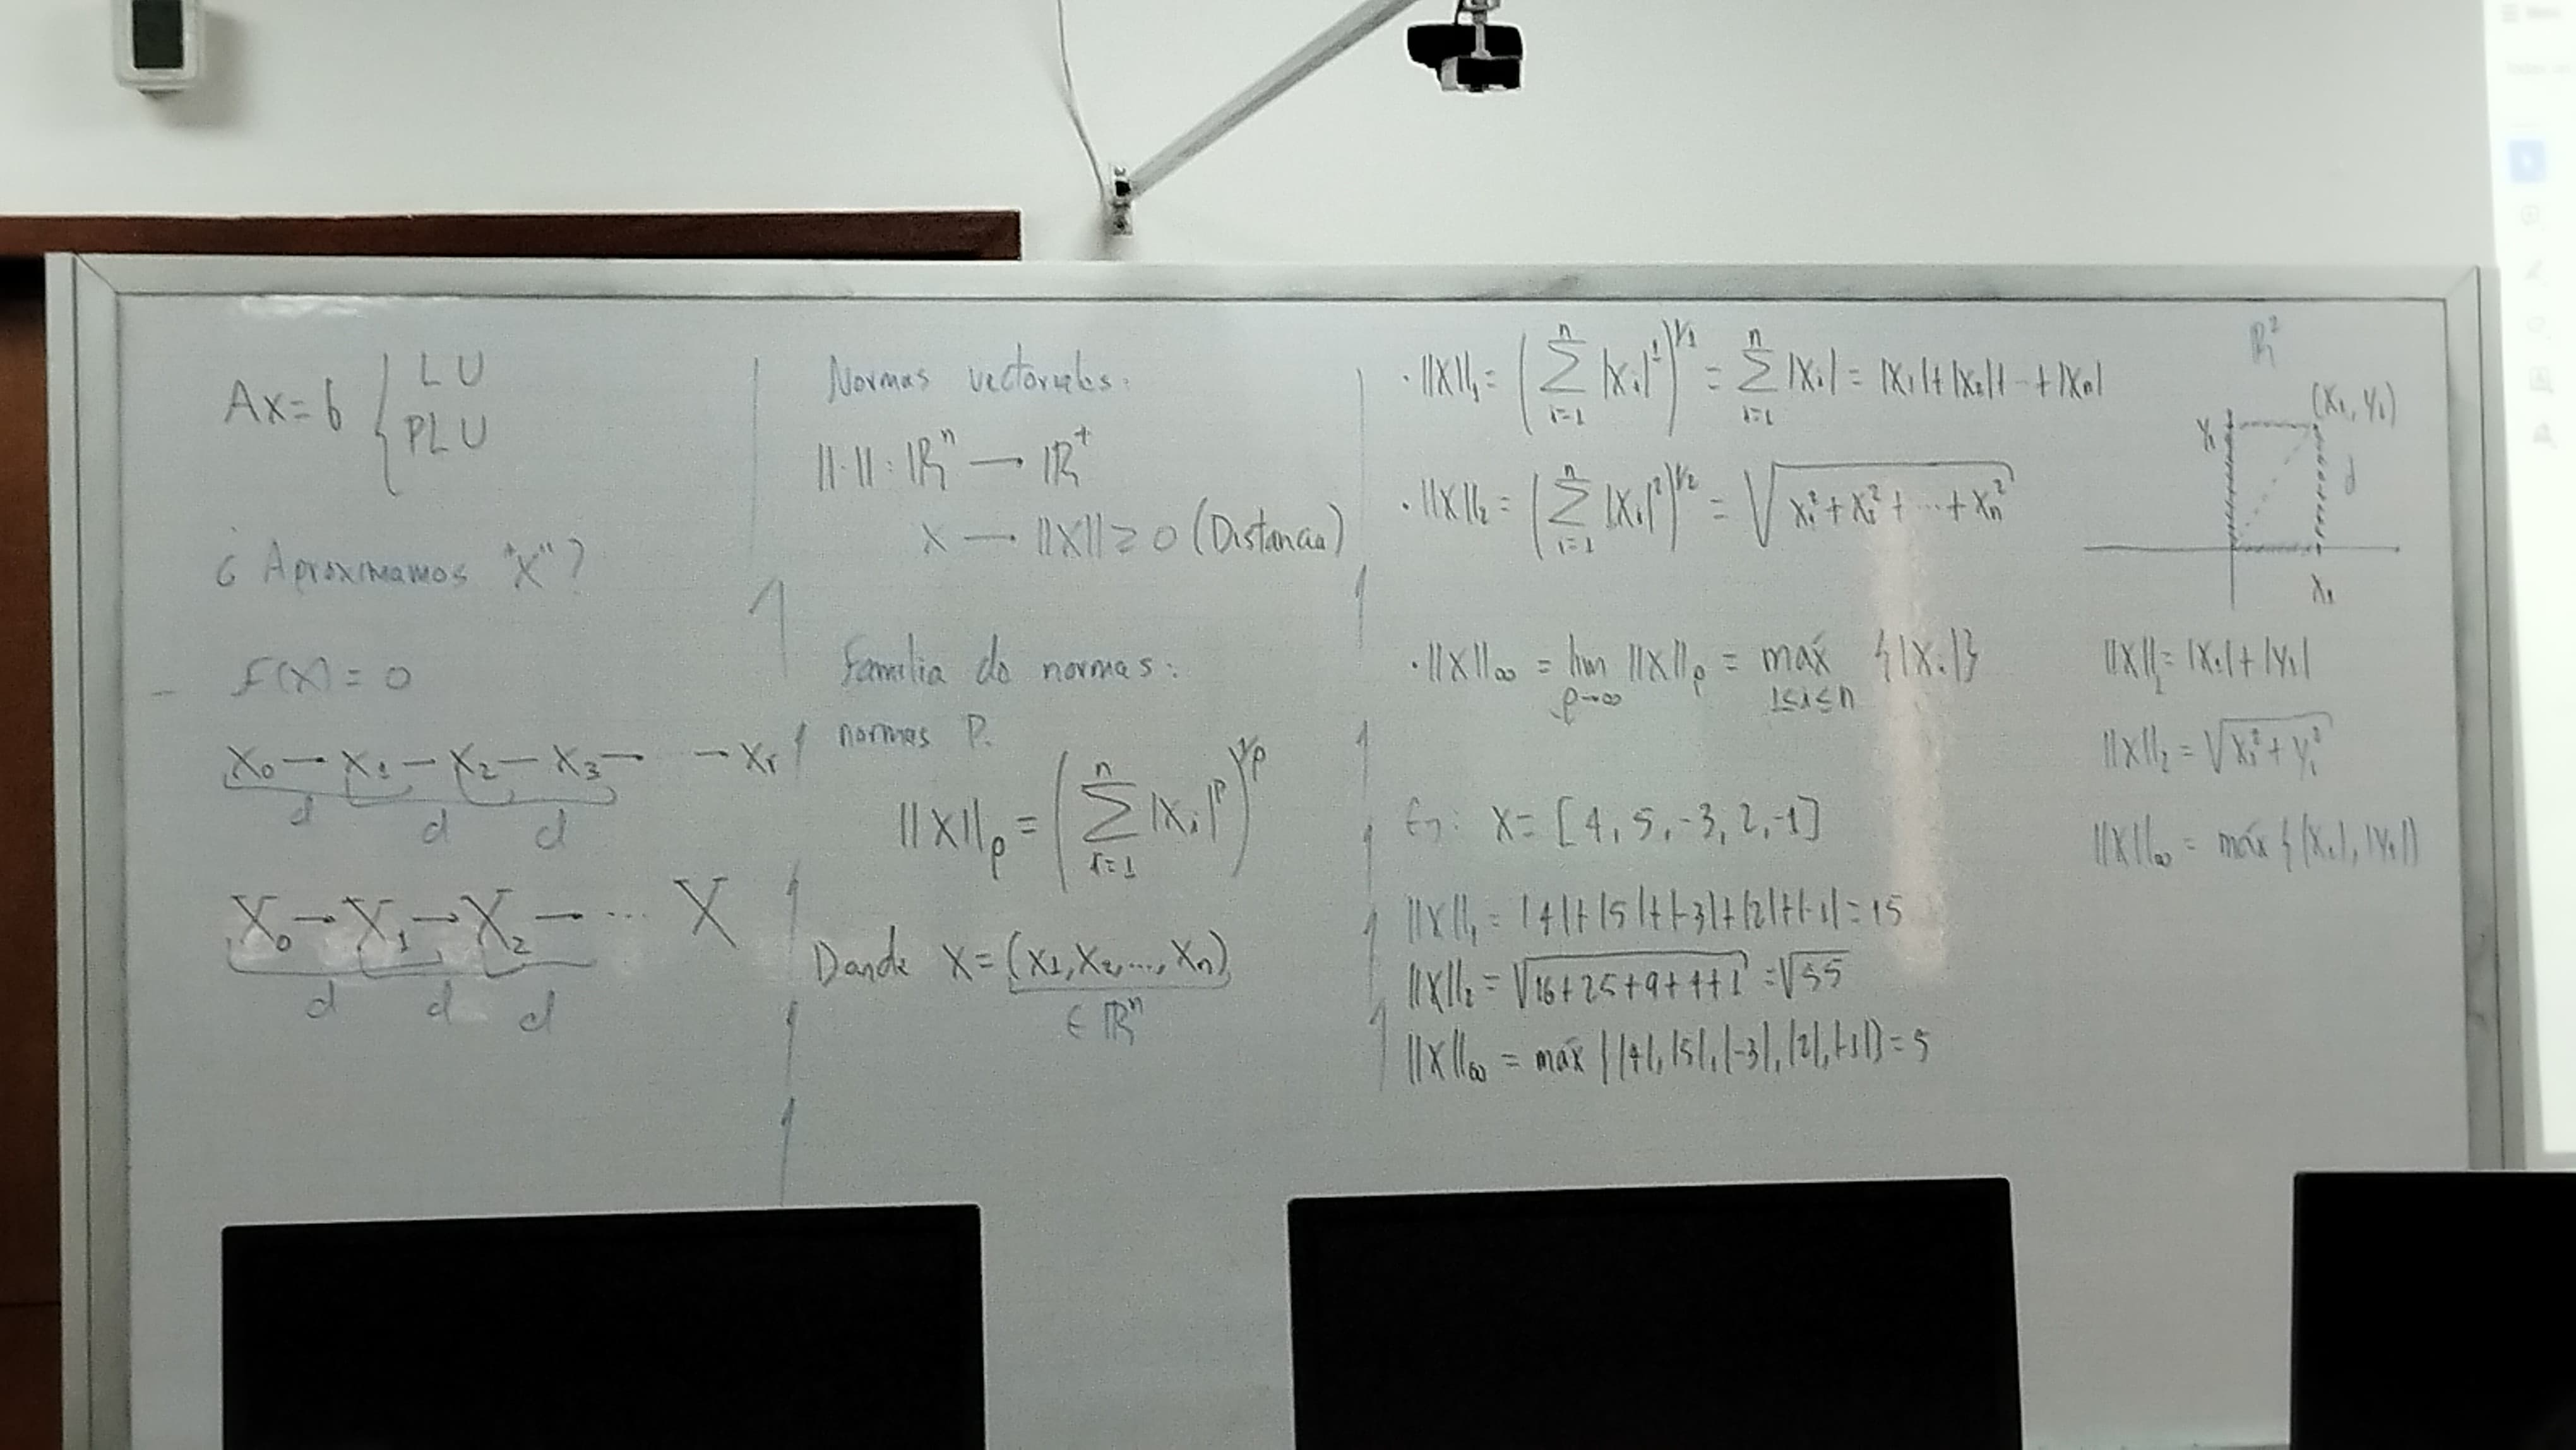)

\documentclass{article}

\usepackage{amsmath}

\begin{document}

\section{Normas vectoriales}

\begin{definition}
Una función $\|\cdot\|: \mathbb{R}^n \to \mathbb{R}$ con la forma

$$\|\mathbf{x}\| = \sqrt{x_1^2 + x_2^2 + \dots + x_n^2}$$

es llamada una **norma vectorial** si satisface las siguientes condiciones:

\begin{enumerate}
\item **Positividad:** Para todo $\mathbf{x} \in \mathbb{R}^n$, entonces $\|\mathbf{x}\| \geq 0$. Si $\mathbf{x} = \mathbf{0}$ (vector nulo), entonces $\|\mathbf{x}\| = 0$.

\item **Homogeneidad:** Sea $a \in \mathbb{R}$, entonces $\|\alpha \mathbf{x}\| = |a| \|\mathbf{x}\|$.

\item **Desigualdad triangular:** Para todo $\mathbf{x}, \mathbf{y} \in \mathbb{R}^n$, entonces $\|\mathbf{x} + \mathbf{y}\| \leq \|\mathbf{x}\| + \|\mathbf{y}\|$.

**Norma $p$**

Dado $p \geq 1$, definimos la norma $p$ de $\mathbf{x}$ como:

$[\|\mathbf{x}\|_p = \left( \sum_{i=1}^n |x_i|^p \right)^{\frac{1}{p}}$]

**Cuando $p = 2$, se obtiene la norma clásica euclidiana.**

**Norma $\infty$**

La norma infinito está definida como:

$[\|\mathbf{x}\|_\infty = \max_{1 \leq i \leq n} \{|x_i|\}$]

Esta norma es conocida como norma infinito, ya que:

$[\lim_{p \to \infty} \|\mathbf{x}\|_p = \|\mathbf{x}\|_\infty$]
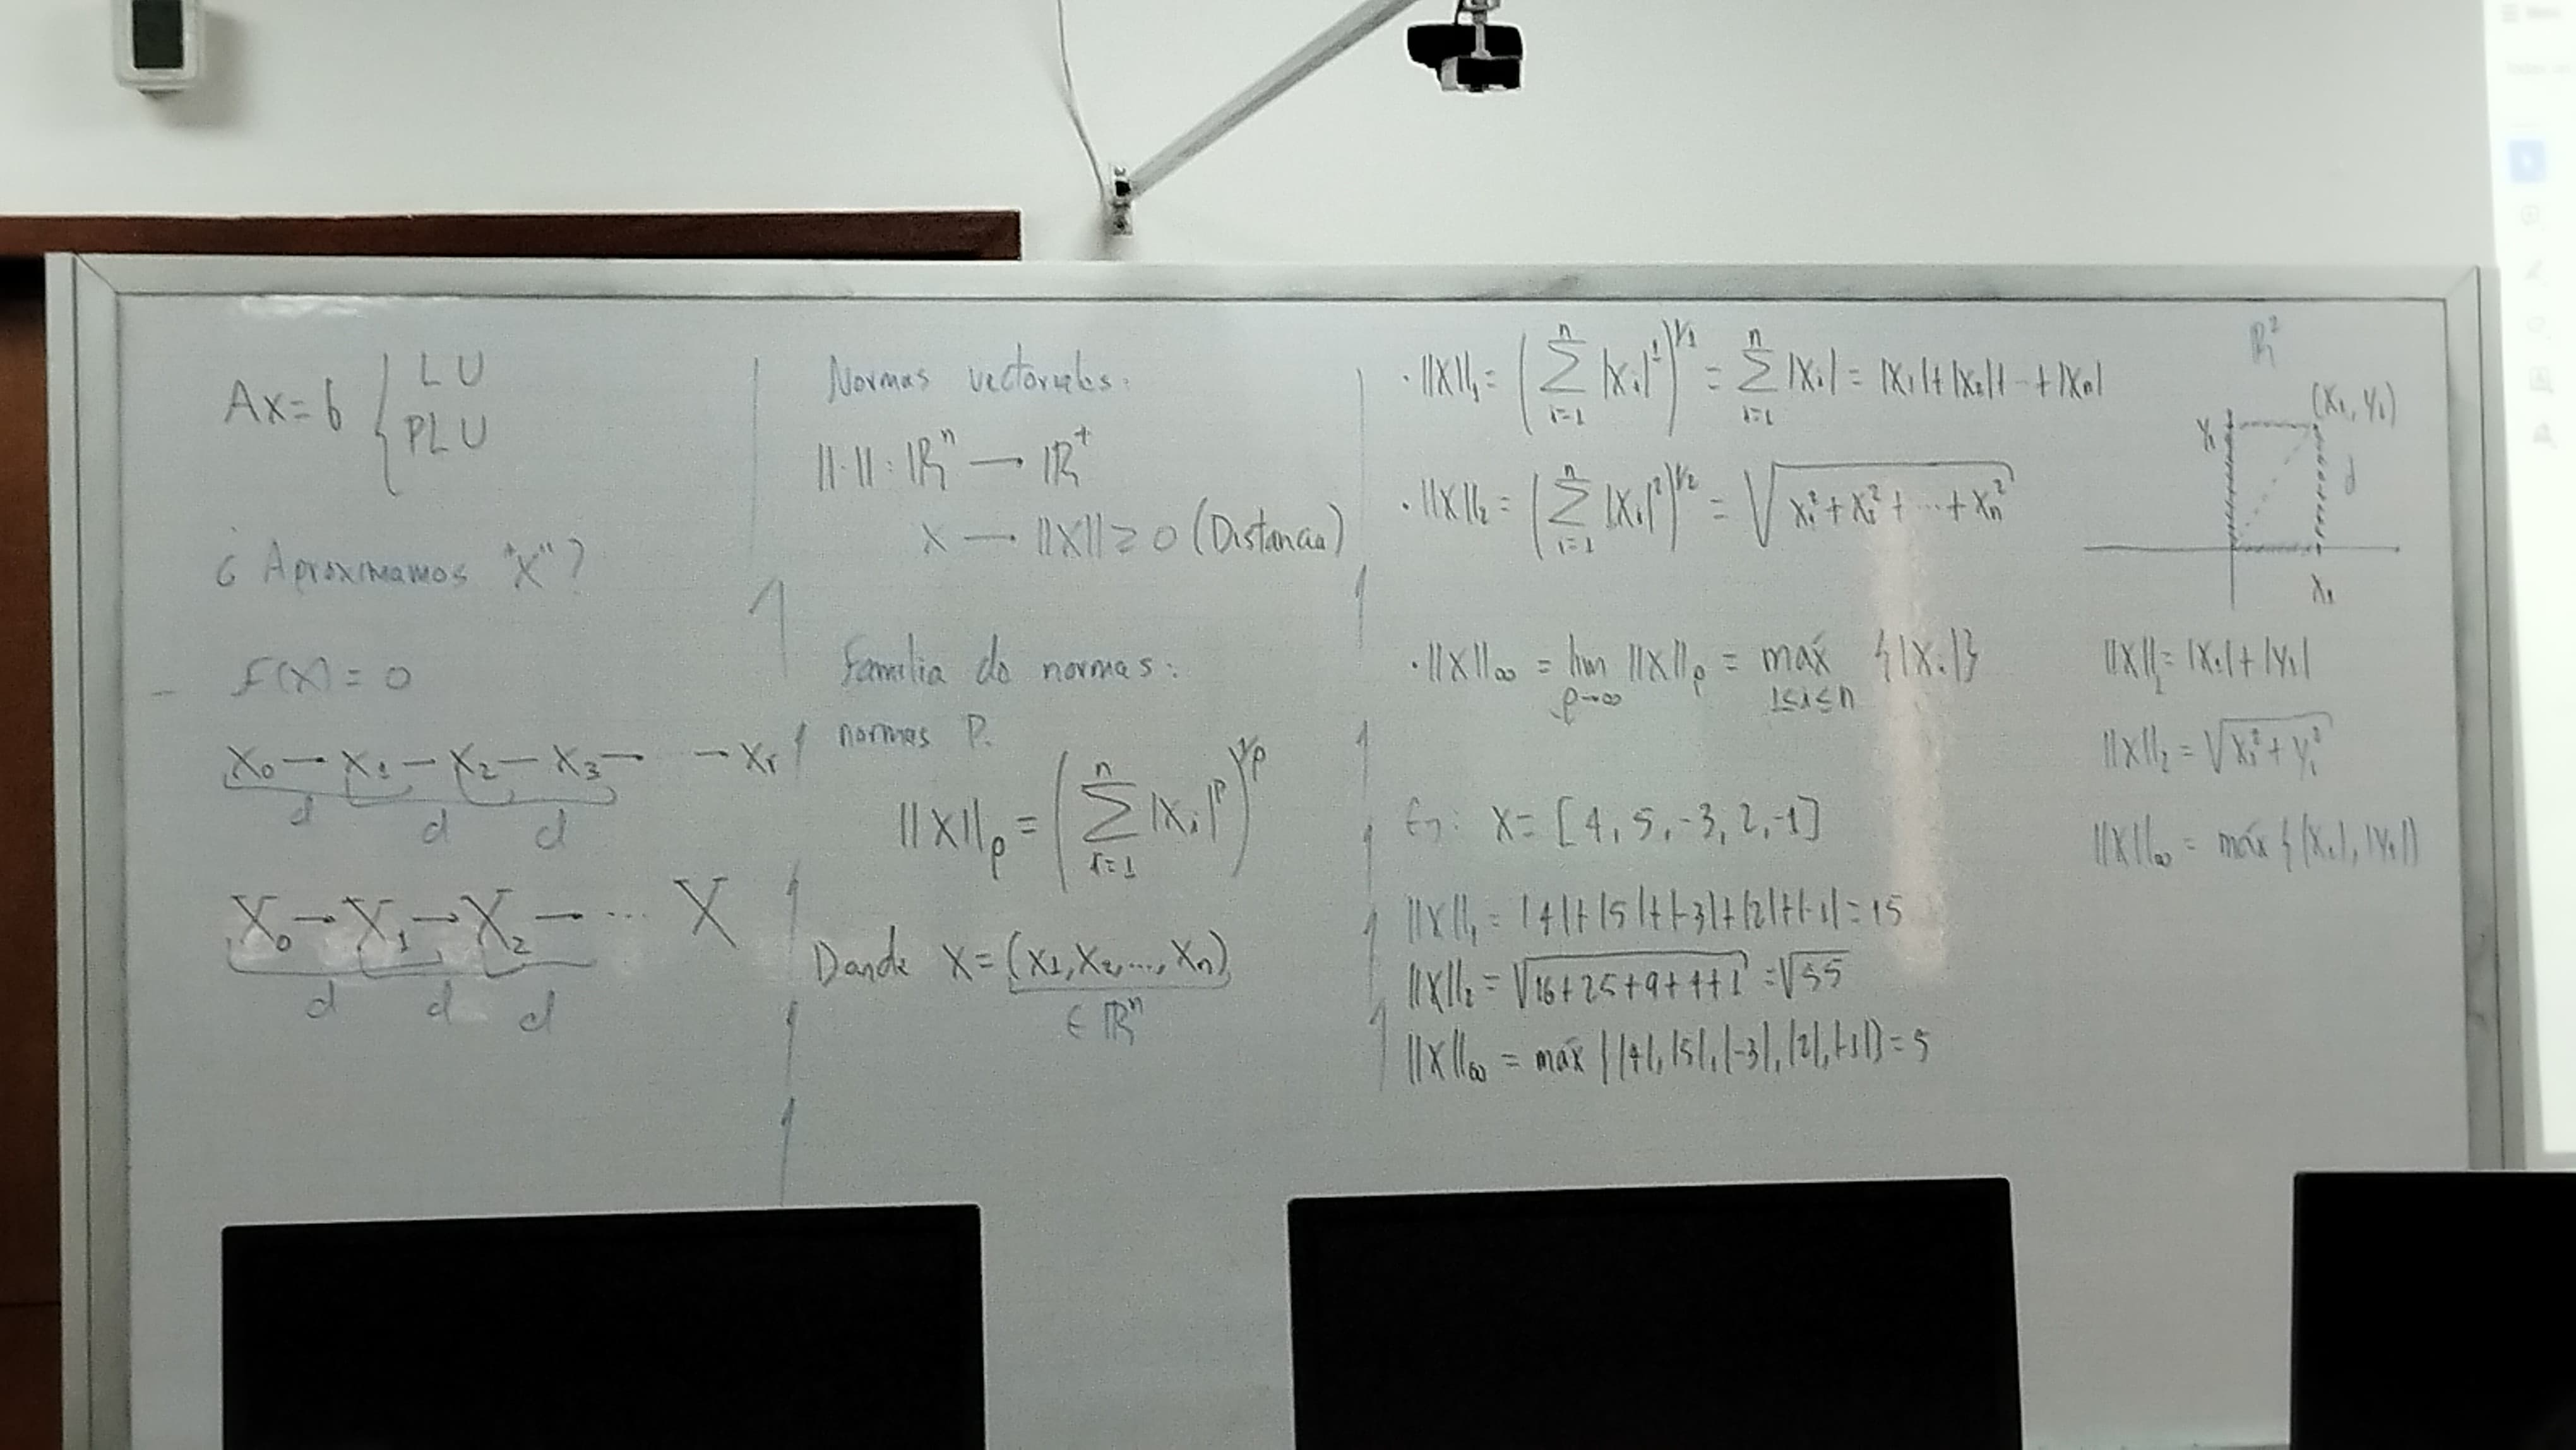

In [ ]:

def normas_vectoriales(x, p):

  if p < 0:
    raise ValueError("Error")

  if p == 1:
    ans = np.abs(x).sum()
  elif p == 2:
    ans = np.sqrt(np.sum(x**2))
  else:
    ans = np.abs(x).max()

  return ans

def normas_vectoriales_vectores(x, y, p):

  x = x - y

  if p < 0:
    raise ValueError("Error")

  if p == 1:
    ans = np.abs(x).sum()
  elif p == 2:
    ans = np.sqrt(np.sum(x**2))
  else:
    ans = np.abs(x).max()

  return ans

#############################

x = np.array([4, 5, -3, 2, -1])
p_values = [1, 2, np.inf]

for p in p_values:
  result = normas_vectoriales(x.copy(), p)
  print(f"p-norm of x for p={p}: {result:.4f}")
print("")

#############################

x = np.array([4, 5, -3, 2, -1])
y = np.array([-3, 2, 4, 10, 5])
p_values = [1, 2, np.inf]

for p in p_values:
  result = normas_vectoriales_vectores(x.copy(), y.copy(), p)
  print(f"p-norm of x for p={p}: {result:.4f}")

p-norm of x for p=1: 15.0000
p-norm of x for p=2: 7.4162
p-norm of x for p=inf: 5.0000

p-norm of x for p=1: 31.0000
p-norm of x for p=2: 14.3875
p-norm of x for p=inf: 8.0000


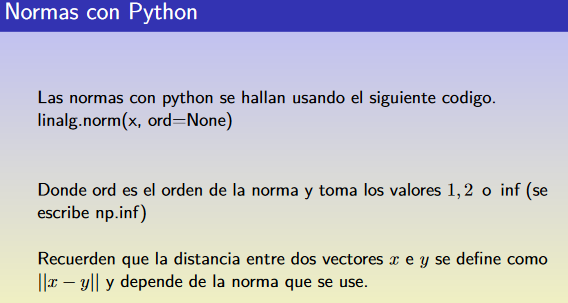

#{Normas matriciales}

**Definición:** Una norma matricial es una función $\|\cdot\|: \mathbb{C}^{m \times n} \to \mathbb{R}$ que asocia a cada matriz $A \in \mathbb{C}^{m \times n}$ un número real no negativo, que mide de alguna manera el "tamaño" de la matriz.

**Propiedades:**

1. **Homogeneidad:** Para cualquier escalar $a \in \mathbb{C}$ y cualquier matriz $A \in \mathbb{C}^{m \times n}$, se cumple $\|aA\| = |a| \|A\|$.
2. **Subaditividad:** Para cualquier matriz $A, B \in \mathbb{C}^{m \times n}$, se cumple $\|A + B\| \leq \|A\| + \|B\|$.
3. **Positividad:** Para cualquier matriz $A \in \mathbb{C}^{m \times n}$, se cumple $\|A\| \geq 0$. Y $\|A\| = 0$ si y solo si $A$ es la matriz nula.
4. **Consistencia con la norma vectorial:** Para cualquier vector $x \in \mathbb{C}^n$, se cumple $\|Ax\| \leq \|A\| \|x\|$.

**Ejemplos:**

* **Norma 1:** $\|A\|_1 = \max_{1 \leq i \leq m} \sum_{j=1}^n |a_{ij}|$
* **Norma 2:** $\|A\|_2 = \sqrt{\lambda_1(A^TA)}$ donde $\lambda_1$ es el mayor valor propio de $A^TA$.
* **Norma ∞:** $\|A\|_\infty = \max_{1 \leq j \leq n} \sum_{i=1}^m |a_{ij}|$




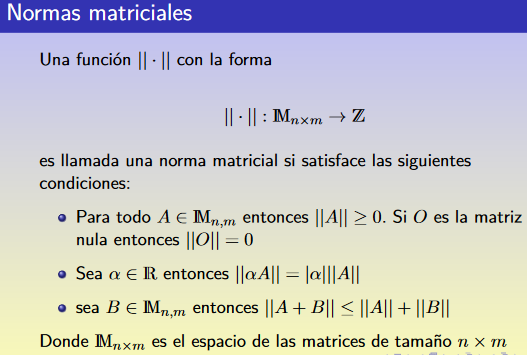

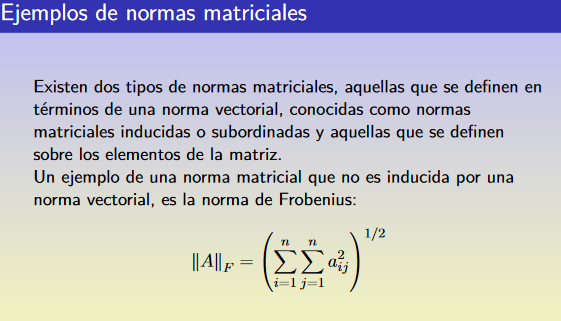

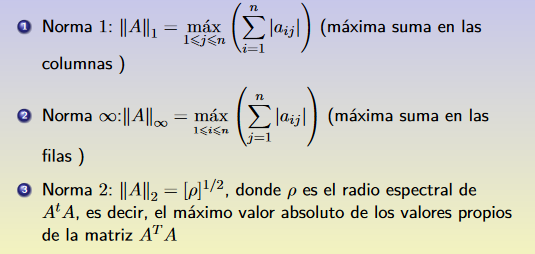

In [ ]:
def normas_matriciales(X, p):
  if p < 0:
    raise ValueError("Error")
  if p == 0:
    # Norma Frobenius
    ans = np.sqrt(np.sum(X**2))
  elif p == 2:
    # Norma espectral
    #ans = np.linalg.norm(X, ord=2)
    c = np.matmul(np.transpose(A), A)
    val_p, vec_p = np.linalg.eig(c) # Hallar los valores propios
    ans = np.sqrt(max(np.abs(val_p)))
  elif p == 1:
    X = np.transpose(X)
    ans = np.linalg.norm(sum(np.abs(X)), ord=p)
  else:
    ans = np.linalg.norm(sum(np.abs(X)), ord=p)
  return ans

X = np.array([[3, 4], [-2, 5]])

norma_frobenius = normas_matriciales(X, 0)
print(f"Norma Frobenius: {norma_frobenius}")

norma_espectral = normas_matriciales(X, 2)
print(f"Norma espectral: {norma_espectral}")

norma_p3 = normas_matriciales(X, 1)
print(f"Norma p para p = 1: {norma_p3}")

norma_p3 = normas_matriciales(np.transpose(X), np.inf)
print(f"Norma p para p = inf: {norma_p3}")

Norma Frobenius: 7.3484692283495345
Norma espectral: 9.106459247018778
Norma p para p = 1: 14.0
Norma p para p = inf: 7.0


In [ ]:
def normasMatriciales(A, p): # Tambien conocidas como inducidas
  ans = 0
  if p == 1:
    return max(sum(abs(A)))
  elif p == 2:
    B = np.matmul(np.transpose(A), A)  # A^tA
    val_p, vec_p = np.linalg.eig(B)  # Hallar los valores propios
    return np.sqrt(max(np.abs(val_p)))  # APlicar el maximo de los valores con la raiz cuadrada
  else:
    return max(sum(abs(np.transpose(A))))

X = np.array([[4, -3, 10], [1, 1, 0]])

Y = np.array([[3, 4, -5], [7, 6, 4]])

X = Y - X

norma_p3 = normasMatriciales(X, 1)
print(f"Norma p para p = 1: {norma_p3}")

norma_espectral = normasMatriciales(X, 2)
print(f"Norma espectral: {norma_espectral}")

norma_p3 = normasMatriciales(X, np.inf)
print(f"Norma p para p = inf: {norma_p3}")

Norma p para p = 1: 19
Norma espectral: 16.725431527012372
Norma p para p = inf: 23


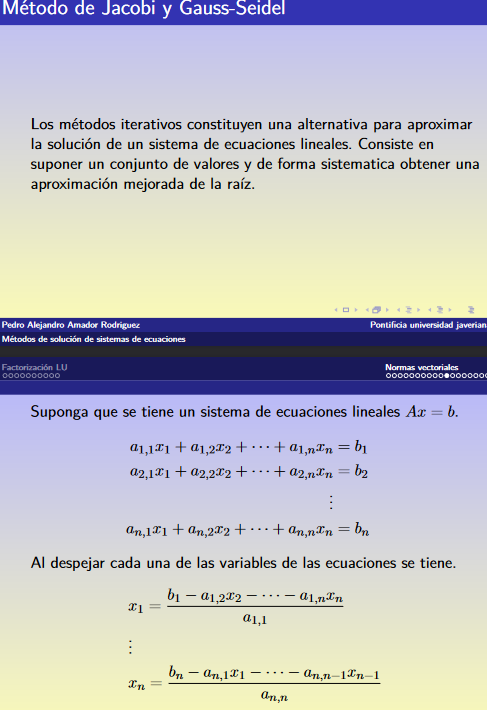

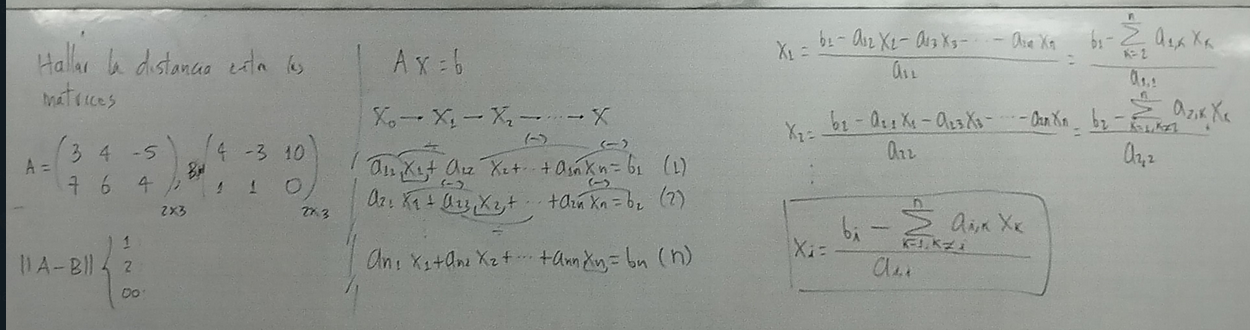

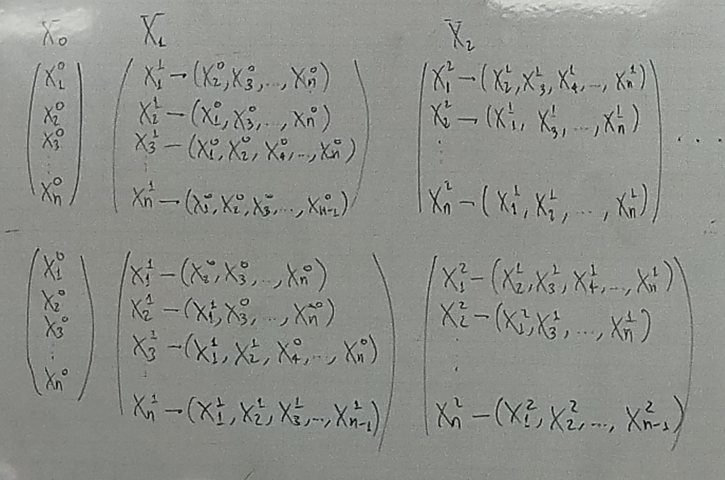

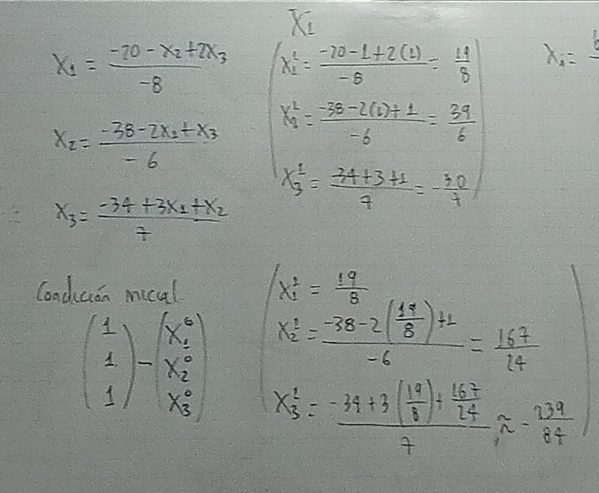

In [ ]:
def jacobi(A, b, x0, m, tol):
  [n, n] = np.shape(A)
  for iter in range(1, m + 1, 1):
    x1 = np.zeros(np.shape(x0))
    for i in range(0, n, 1): # Cambiar de x_i
      suma = 0
      for j in range(0, n, 1): # Sumatoria
        if i != j:
          suma += A[i, j] * x0[j]
      x1[i] = (b[i] - suma) / (A[i, i])
    if np.linalg.norm(x0 - x1, 1) <= tol:
      return x1, iter
    x0 = x1
  return x1, iter

A = np.array([
[4, 3, 0],
[1, 3, 1],
[1, 2, 5],
])
b = np.array([4, 5, 6])
x0 = np.array([1, 1, 1])
tol = 1e-6
iter = 50

x = jacobi(A, b, x0, iter, tol)
print(x)
print(np.dot(A,x[0]))

(array([-0.12500011,  1.4999999 ,  0.62499991]), 37)
[3.99999928 4.99999951 5.99999926]


In [ ]:
def gauss_seidel(A, b, x0, tol, iter):
    n = len(A)
    x = x0.copy()
    it = 0
    error = tol
    while error >= tol and it < iter:  # Corrección de la condición de parada
        for i in range(n):
            sum = 0.0
            for j in range(n):
                if j != i:
                    sum += A[i][j] * x[j]

            x[i] = (b[i] - sum) / A[i][i]

        error = normas_vectoriales(x0 - x, 1)

        x0 = x.copy()
        it += 1
    return x, it

"""
Ejemplo de uso del método de Gauss-Seidel.
"""

A = np.array([
  [-8, 1, -2],
  [2, -6, -1],
  [-3, -1, 7],
])
b = np.array([-20, -38, -34])
x0 = np.array([1, 1, 1])
tol = 1e-6
iter = 50

x = gauss_seidel(A, b, x0, tol, iter)
print(x)
print(np.dot(A,x[0]))


A = np.array([
  [4, 3, 0],
  [1, 3, 1],
  [1, 2, 5],
],float)
b = np.array([4, 5, 6])
x0 = np.array([1, 1, 1])
tol = 10**(-100)
iter = 50

x = gauss_seidel(A, b, x0, tol, iter)
print(x)
print(np.dot(A,x[0]))




(array([ 4,  8, -2]), 3)
[-20 -38 -34]
(array([0, 1, 0]), 2)
[3. 3. 2.]


In [ ]:

def es_diagonal_dominante2(matriz):
    # Obtener la diagonal de la matriz
    diagonal = np.diag(np.abs(matriz))

    # Obtener la suma de los valores absolutos de cada fila, sin incluir la diagonal
    suma_filas = np.sum(np.abs(matriz), axis=1) - diagonal

    # Verificar si la diagonal es estrictamente mayor que la suma de los valores absolutos de cada fila
    es_diagonal_dominante = np.all(diagonal > suma_filas)

    return es_diagonal_dominante


def es_diagonal_dominante(matriz):
    filas, columnas = matriz.shape
    es_diagonal_dominante = True

    for i in range(filas):
        suma_abs = 0
        diagonal = abs(matriz[i, i])

        for j in range(columnas):
            if j != i:
                suma_abs += abs(matriz[i, j])

        if diagonal <= suma_abs:
            es_diagonal_dominante = False
            break

    return es_diagonal_dominante

# Ejemplo de uso:
matriz = np.array([[4, -1, 0],
                   [-1, 4, -1],
                   [0, -1, 3]])

resultado = es_diagonal_dominante(matriz)



if resultado:
    print("La matriz es diagonal dominante.")
else:
    print("La matriz no es diagonal dominante.")


La matriz es diagonal dominante.


In [ ]:
import numpy as np

def calculate_k_norm(A, norm_type):
    if np.linalg.det(A) == 0:
        raise ValueError("La matriz es singular y no tiene inversa.")

    if norm_type == '1':
        norm_A = np.linalg.norm(A, ord=1)
        norm_A_inv = np.linalg.norm(np.linalg.inv(A), ord=1)
    elif norm_type == '2':
        norm_A = np.linalg.norm(A, ord=2)
        norm_A_inv = np.linalg.norm(np.linalg.inv(A), ord=2)
    elif norm_type == 'inf':
        norm_A = np.linalg.norm(A, ord=np.inf)
        norm_A_inv = np.linalg.norm(np.linalg.inv(A), ord=np.inf)
    else:
        raise ValueError("Invalid norm type. Please choose from '1', '2', or 'inf'.")

    k_norm = norm_A * norm_A_inv
    return k_norm

# Ejemplo de uso
A = np.array([
  [4, 3, 0],
  [1, 3, 1],
  [1, 2, 5],
],float)

norm_type = input("Ingrese el tipo de norma a utilizar (1, 2, o inf): ")
k_norm = calculate_k_norm(A, norm_type)
print(f"La norma k(A) con norma {norm_type} es: {k_norm}")


Ingrese el tipo de norma a utilizar (1, 2, o inf): 1
La norma k(A) con norma 1 es: 8.0


In [ ]:
A = np.array([[1, 1.01], [0.99, 1]])
b_1 = np.array([[1], [1]])
b_2 = np.array([[1.01], [0.99]])
x_1 = np.linalg.solve(A, b_1)
x_2 = np.linalg.solve(A, b_2)
print(x_1, x_2)

[[-100.]
 [ 100.]] [[101.]
 [-99.]]


# Imagenes varias

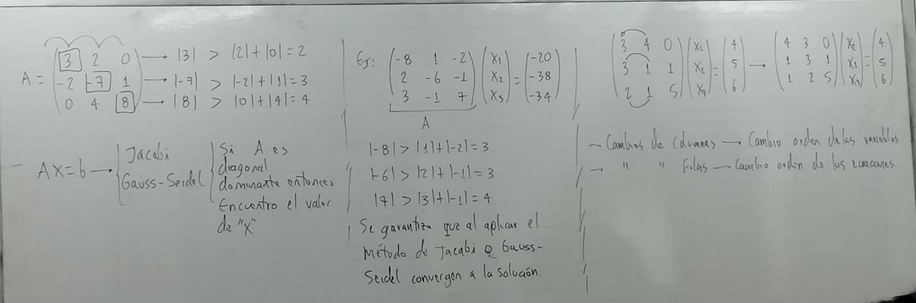

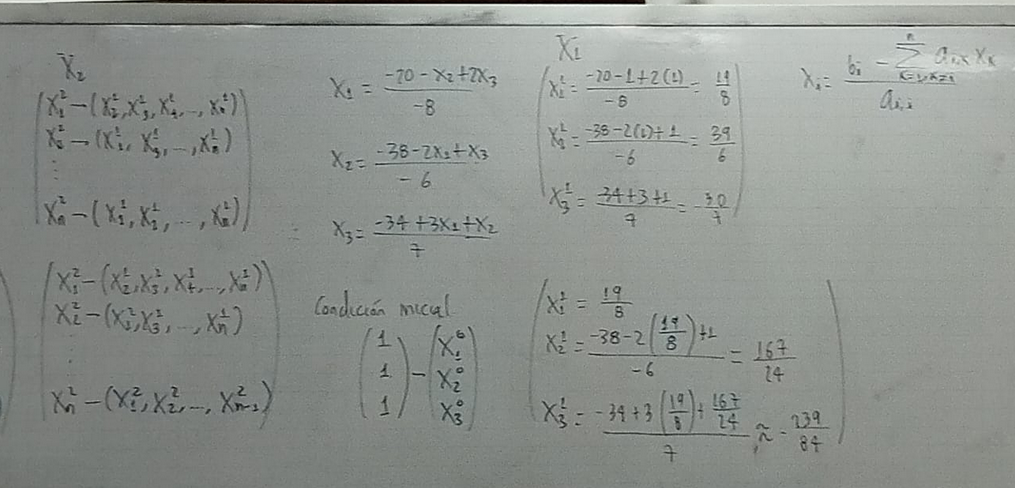

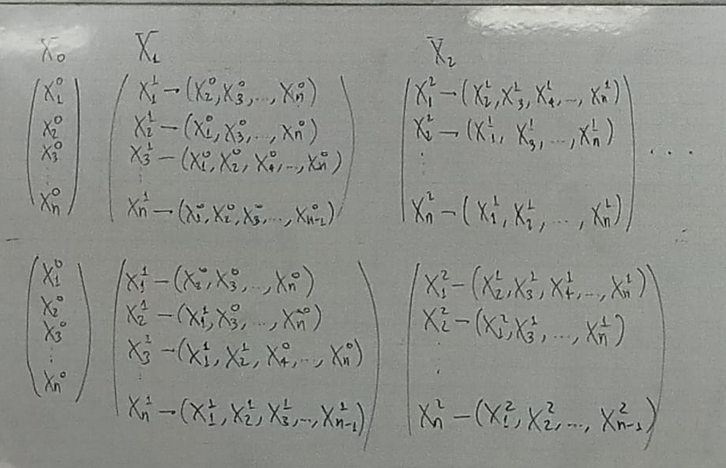

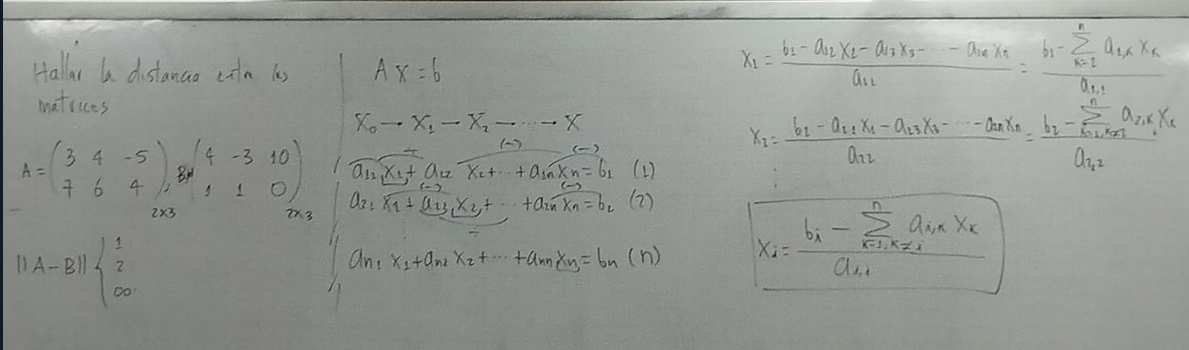

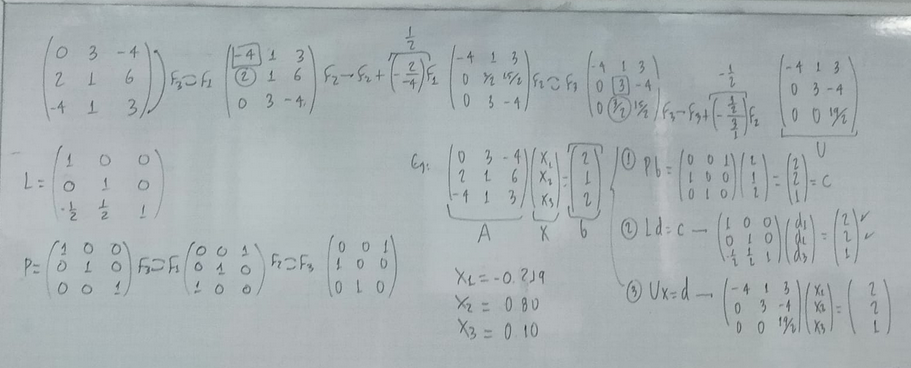

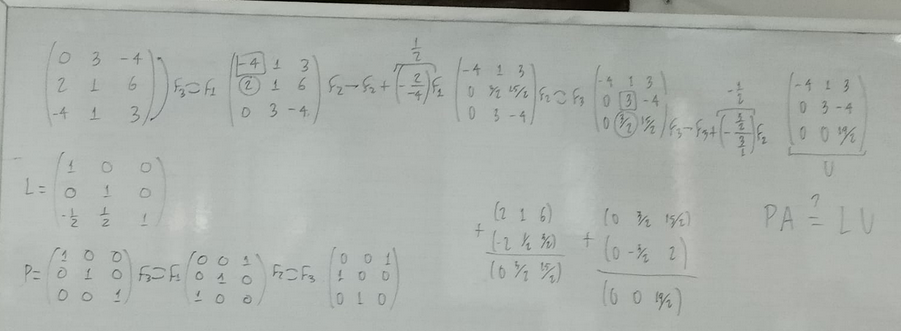

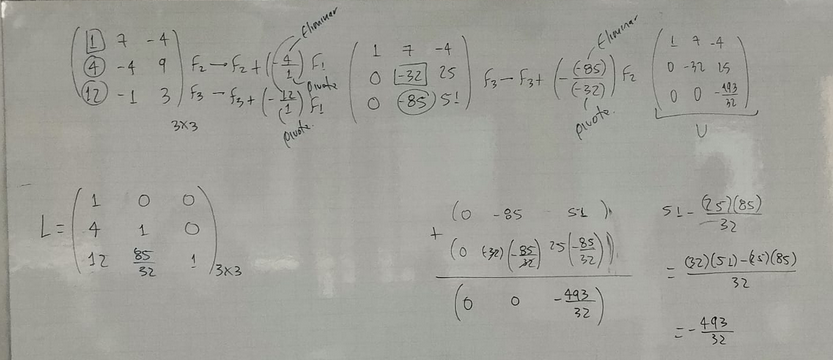

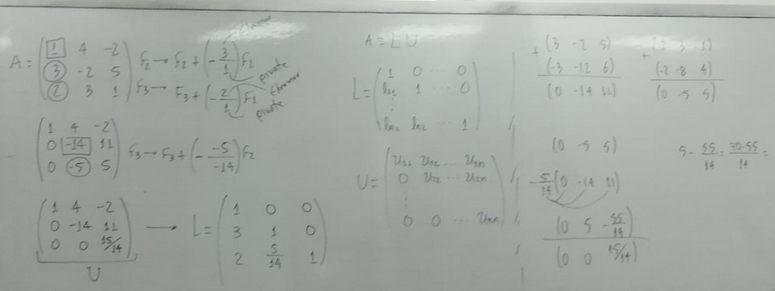